***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$\mathbf{\text{Date: 05/05}}$<br>
***

***
$\mathbf{\text{Simple Micro Kinetic Model for CO Oxidation}}:$<br>
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO

$$ CO + * \rightleftharpoons CO^{*} $$

Reaction 2:&emsp;Adsorption of $O_2$

$$ O_2 + * \rightleftharpoons {O_2}^{*} $$

Reaction 3:&emsp;Dissociation of ${O_2}^*$ 

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$

Reaction 4:&emsp;Surface Reaction of $CO$ and $O_2$  

$$ {CO}^{*} + {O}^{*} \rightleftharpoons CO_2 + 2* $$



***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

#### Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}^2 $$

The Corresponding Differential Equations corresponding to the rate of formations of the different coverages:

$$r_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$r_{\theta_{O_2}} = \frac{d\theta_{O_2}}{dt} = r_2 - r_3 $$

$$r_{\theta_{O}} = \frac{d\theta_{O}}{dt} = 2 r_3 - r_4 $$

$$r_{\theta_{*}} = \frac{d\theta_{*}}{dt} = 2 r_4 - r_1 - r_2 - r_3 $$




In [1]:
from main import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
%%time 
MKM = MKModel('Atomic.csv','Stoich.csv','Param.csv') 

Mass is conserved. 

CPU times: user 19.1 ms, sys: 4.91 ms, total: 24 ms
Wall time: 26.5 ms


In [3]:
#Atomic Matrix
MKM.Atomic

,A\S,CO,O2,CO2,CO*,O*,O2*,*
0,C,1,0,1,1,0,0,0
1,O,1,2,2,1,1,2,0
2,*,0,0,0,1,1,1,1


In [4]:
#Stoichiometric Matrix
MKM.Stoich

,r\S,P_CO,P_O2,P_CO2,theta_CO,theta_O,theta_O2,theta_*
0,r1,-1,0,0,1,0,0,-1
1,r2,0,-1,0,0,0,1,-1
2,r3,0,0,0,0,2,-1,-1
3,r4,0,0,1,-1,-1,0,2


In [5]:
#Gaseous Pressure Conditions [atm]
MKM.P

array([1.e-08, 1.e-08, 1.e-08])

In [6]:
MKM.set_initial_coverages(init=[0,0,0,1]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM.set_rxnconditions(Pr=[1e-8,1e-8,1e-8]) #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM.set_limits_of_integration(Ti=0,Tf=2e6);#Sets the reange of time used in integration

In [7]:
#Rate Constants
kval = np.array([7.79027001e+06, 2.76471157e+03, 9.33338097e+06, 6.22390802e+00,
 9.33374875e+05, 1.55909555e+04, 3.86227078e+04, 5.32781881e+06])
MKM.k = kval

<IPython.core.display.Javascript object>


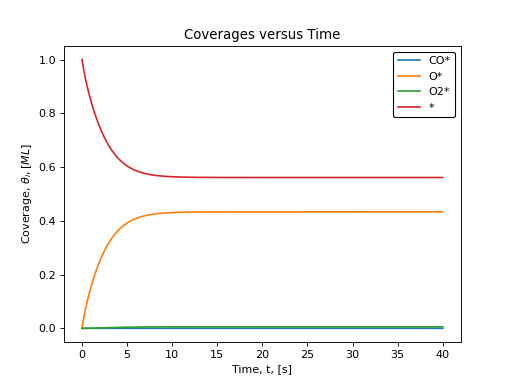

In [8]:
sol,solt= MKM.solve_coverage(plot=True,Tf_eval=linspace(0,40,200)) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)

<IPython.core.display.Javascript object>


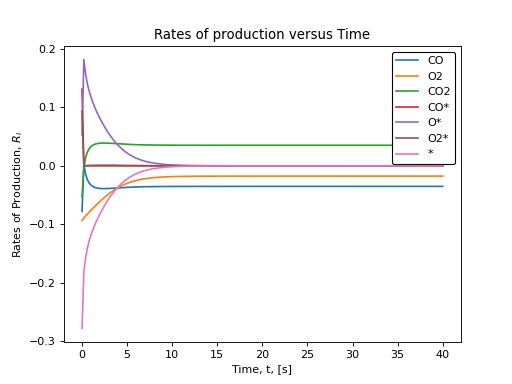

In [9]:
rsol,rsolt= MKM.solve_rate_production(plot=True,Tf_eval=linspace(0,40,200))

<IPython.core.display.Javascript object>


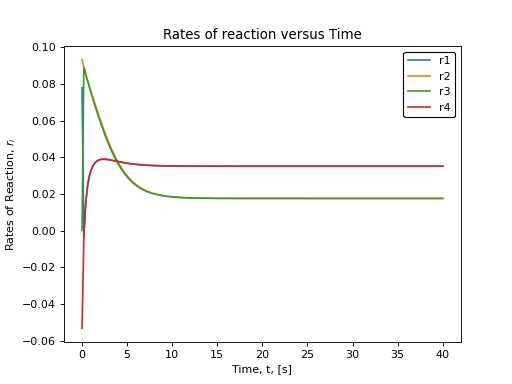

In [10]:
MKM.label='rates_r'
a = MKM.solve_rate_reaction(plot=True,Tf_eval=linspace(0,40,200))

### Degree of Rate Control
Original format:
$$X_{RC_i} = \left(\frac{d ln(r)}{d ln k_i}\right)_{k_{i\neq j},K_{i}} $$

Simplified:

$$X_{RC_i}=\frac{r_{new_i} - r_o}{p_{inc}*r_o} $$

Note:

$r_{new_i}$ : The rate of the designated reaction i of whose rate constants where increased by $p_{inc}$

$p_{inc}$ : Percent increase applied to the rate constants of the designated rate being studied. (All other rate constants for the other reactions remain unchanged)

$r_o$ : The rate of reaction of the step being compared against (Usually the production or synthesis step)

In [11]:
 def get_X_RC_TS(p_inc=0.1,k_o_inp=[],rxn=-1,j =1,no_points=100, e_time = 40):
    #p_inc is the percent increase of rate const. #k_o_inp, is the inputed rate constants to allow for their initial values to be user defined, #rxn is the reaction producing the products being investigated : -1 indicates the last elementary step
    if k_o_inp!=[]:
        k_o = k_o_inp
    else:
        k_o = np.array(MKM.kextract()) #From Param file

    Xrc = [] #Initializing the empty array of degrees of rate control
    MKM.k = np.array(k_o)
    rin = np.array(MKM.solve_rate_reaction(plot=False,Tf_eval=linspace(0,e_time,no_points))[0][j]) #[0] extracts sol and not time
    # enablePrint()
    # print('--initial SSrates')
    # print(rin)
    # print('\n')

    if rxn>len(rin) or rxn<(-len(rin)):
        raise Exception('An invalid rxn value has been entered')
    else:
        ro = rin[rxn] 

    for i in np.arange(len(rin)):
        n = 2*i
        kfwd = k_o[n]*(1+p_inc) #Multiplying the relevant forward rate const. by the change
        krvs = k_o[n+1]*(1+p_inc) #Multiplying the relevant reverse rate const. by the change
        indices = [n,n+1] #The relevant indices in the rate const. array corresponding to this change
        repl = [kfwd,krvs] #The changed rate const.s corresponding to the indices
        knew = np.array(k_o) #Re-initializing knew so it can only be changed for the specific elementary steps (i.e so that other rate constants remain unchanged)
        for index, replacement in zip(indices, repl):
            knew[index] = replacement
        MKM.k = np.array(knew)
        rnew = np.array(MKM.solve_rate_reaction(plot=False,Tf_eval=linspace(0,e_time,no_points))[0][j])

        Xrc.append((rnew[rxn]-ro)/(ro*p_inc))

    MKM.k = np.array(k_o)

    return Xrc

In [12]:
%%time
no_points = 200
e_time= 40
MKM.set_rxnconditions(Pr=[1e-8,1e-8,1e-8])
outp = np.empty((no_points,6))
outp[:,0] = rsolt
for k in np.arange(len(rsolt)):
    outp[k,1:5] = get_X_RC_TS(k_o_inp = kval, p_inc=0.01,j=k,no_points=no_points,e_time=e_time)
    s = sum(outp[k,1:5])
    outp[k,5] = s

/var/folders/_p/qwgws2w95qxf051hv3d15ky5_tzjzl/T/ipykernel_21578/2277035873.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if k_o_inp!=[]:


CPU times: user 27min 8s, sys: 6.07 s, total: 27min 14s
Wall time: 27min 16s


<IPython.core.display.Javascript object>


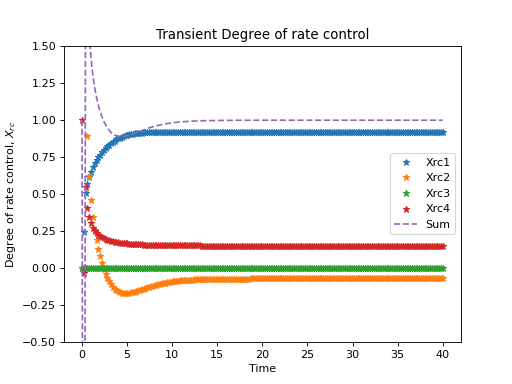

In [13]:
time = outp[:,0]
plt.figure()
plt.plot(time,outp[:,1],'*',label='Xrc1')
plt.plot(time,outp[:,2],'*',label='Xrc2')
plt.plot(time,outp[:,3],'*',label='Xrc3')
plt.plot(time,outp[:,4],'*',label='Xrc4')
plt.plot(time,outp[:,5],'--',label='Sum')
plt.ylim([-0.5,1.5])
plt.xlabel('Time')
plt.ylabel(r'Degree of rate control, $X_{rc}$')
plt.title('Transient Degree of rate control')
plt.legend()
plt.show()